In [1]:
from __future__ import division
import os
import sys

import numpy as np
import pandas as pd

import pysam

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [9]:
sf = pysam.AlignmentFile('yeast.sorted.bam', 'rb')

In [3]:
## Store all reads; not normally a good idea, but file is small enough to be quick enough
reads = [r for r in sf.fetch()]

In [4]:
## List comprehension to get mapping quality for each read
mq = [x.mapping_quality for x in reads]

In [5]:
## Get strand for each read (turn the boolean to an int -- not necessary, but hey whatevs, lets just say for fun)
strand = [int(x.is_reverse) for x in reads]

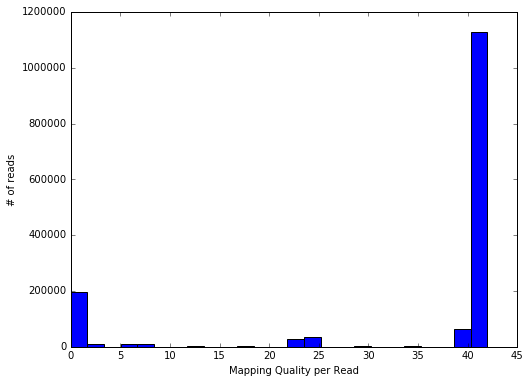

In [6]:
## Mapping quality hist
fig,ax = plt.subplots(1,1, figsize=(8,6), facecolor='#FFFFFF')
hist,bins = np.histogram(mq, bins=25)

ax.bar(bins[:-1], hist, width=bins[-1]-bins[-2])

ax.set_xlabel('Mapping Quality per Read')
ax.set_ylabel('# of reads')

In [8]:
## Fraction of positive and negative strand reads
revFraction = np.mean(strand)
fwdFraction = 1 - revFraction

print 'Reverse fraction of reads: {}'.format(revFraction)
print 'Forward fraction of reads: {}'.format(fwdFraction)

Reverse fraction of reads: 0.476054147882
Forward fraction of reads: 0.523945852118
